In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [2]:
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
warnings.filterwarnings('ignore', '^internal gelsd')
np.random.seed(42)

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
x_train_full.shape

(60000, 28, 28)

In [6]:
x_train_full.dtype

dtype('uint8')

In [7]:
# Valid = 유효한
x_valid, x_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test / 255.0

In [8]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
class_names[y_train[0]]

'Coat'

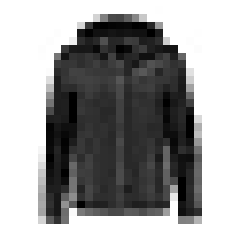

In [10]:
plt.imshow(x_train[0], cmap="binary")
plt.axis('off')
plt.show()

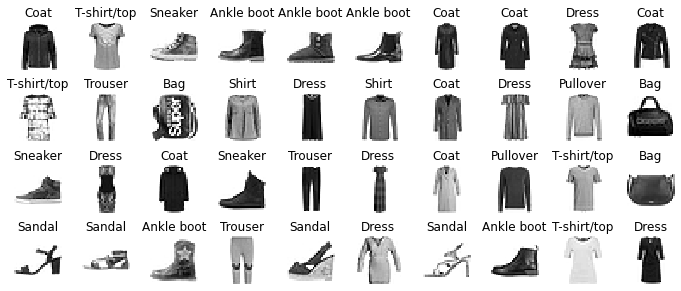

In [11]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train[index], cmap='binary', interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 스퀸셜 API를 사용하여 모델 만들기

In [12]:
# # Dence = 밀집한, Flatten = 납작해지다
# # 모델 생성
# model = keras.models.Sequential()
# # 1D 배열로 변환한다. X 데이터를 받으면 reshape(-1, 1) 
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# # 300개의 히든레이아웃 생성
# model.add(keras.layers.Dense(300, activation='relu'))
# model.add(keras.layers.Dense(100, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax'))

In [13]:
keras.backend.clear_session()

In [14]:
# 리스트로 한번에 제작이 가능하다.
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

In [15]:
model.layers

In [16]:
# 모든 층을 출력함
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [18]:
model.get_layer('dense') is hidden1

True

In [19]:
weights, biases = hidden1.get_weights()

In [20]:
weights

array([[ 0.02550732, -0.02735044, -0.00519114, ..., -0.04180191,
         0.02375359, -0.05850173],
       [ 0.01946905, -0.06714166, -0.06517482, ..., -0.02281709,
        -0.01701074, -0.03685649],
       [ 0.06905811,  0.02847452,  0.04594326, ..., -0.02647167,
        -0.03864872,  0.00228655],
       ...,
       [ 0.01645738, -0.04891685, -0.0058926 , ...,  0.01014884,
        -0.05363333, -0.02499604],
       [ 0.07228859, -0.04023219, -0.00766204, ..., -0.02889049,
         0.05326839,  0.04322128],
       [-0.06252505,  0.05052356, -0.02754802, ...,  0.0384405 ,
        -0.05583369, -0.0704309 ]], dtype=float32)

In [21]:
weights.shape

(784, 300)

In [22]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [23]:
biases.shape

(300,)

In [24]:
# Model Compiler
model.compile(
#               loss = keras.losses.sparse_categorical_crossentropy,
              loss='sparse_categorical_crossentropy',
              # optimizer = 'SGD',
              optimizer = keras.optimizers.SGD(lr = 0.01),
#               metrics = [keras.metrics.sparse_categorical_accuracy]
              metrics=['accuracy']
)

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [25]:
# model Training and Evalution
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 2s 39us/sample - loss: 0.7292 - accuracy: 0.7585 - val_loss: 0.5140 - val_accuracy: 0.8300
Epoch 2/30
55000/55000 [==============================] - 2s 34us/sample - loss: 0.4915 - accuracy: 0.8279 - val_loss: 0.4386 - val_accuracy: 0.8548
Epoch 3/30
55000/55000 [==============================] - 2s 35us/sample - loss: 0.4456 - accuracy: 0.8437 - val_loss: 0.4560 - val_accuracy: 0.8320
Epoch 4/30
55000/55000 [==============================] - 2s 35us/sample - loss: 0.4178 - accuracy: 0.8531 - val_loss: 0.4085 - val_accuracy: 0.8534
Epoch 5/30
55000/55000 [==============================] - 2s 35us/sample - loss: 0.3987 - accuracy: 0.8598 - val_loss: 0.3830 - val_accuracy: 0.8686
Epoch 6/30
55000/55000 [==============================] - 2s 35us/sample - loss: 0.3824 - accuracy: 0.8651 - val_loss: 0.3723 - val_accuracy: 0.8688
Epoch 7/30
55000/55000 [==============================] -

In [26]:
print(history.history['accuracy'])

[0.75847274, 0.82789093, 0.84374547, 0.8530909, 0.8598, 0.86514544, 0.8700182, 0.8728727, 0.8774, 0.8800727, 0.8825455, 0.8854727, 0.8878545, 0.8898727, 0.8921818, 0.89452726, 0.89654547, 0.8990727, 0.9006182, 0.90276366, 0.90436363, 0.9067636, 0.9072545, 0.90974545, 0.9115818, 0.9122364, 0.91325456, 0.91532725, 0.9172909, 0.91834545]


In [27]:
# Training Epochs
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
# Training Parmametor
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

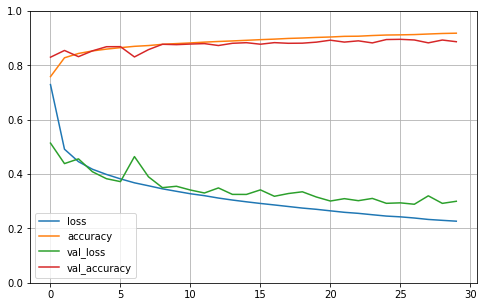

In [30]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid()
plt.gca().set_ylim(0, 1)
# plt.gca().set_xlim(0, 1)
plt.show()

In [31]:
model.metrics_names

['loss', 'accuracy']

In [32]:
# 모델평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

10000/10000 - 0s - loss: 0.3375 - accuracy: 0.8814


In [33]:
# 분류 예측하기
predictions = model.predict(x_test)
print(predictions[0])
print(class_names[y_test[0]], '=>', class_names[np.argmax(predictions[0])])

[2.6306137e-07 6.0876069e-09 5.5575282e-07 1.5083679e-06 3.0279827e-07
 1.0309373e-03 4.0361030e-07 4.5886342e-03 2.1923852e-05 9.9435544e-01]
Ankle boot => Ankle boot


In [34]:
np.max(history.history['val_accuracy'])

0.8958

In [35]:
for i in range(0, 100):
    print(class_names[y_test[i]], '=>', class_names[np.argmax(predictions[i])])               

Ankle boot => Ankle boot
Pullover => Pullover
Trouser => Trouser
Trouser => Trouser
Shirt => Shirt
Trouser => Trouser
Coat => Coat
Shirt => Shirt
Sandal => Sandal
Sneaker => Sneaker
Coat => Coat
Sandal => Sandal
Sneaker => Sneaker
Dress => Dress
Coat => Coat
Trouser => Trouser
Pullover => Pullover
Coat => Pullover
Bag => Bag
T-shirt/top => T-shirt/top
Pullover => Pullover
Sandal => Sandal
Sneaker => Sneaker
Ankle boot => Sandal
Trouser => Trouser
Coat => Pullover
Shirt => Shirt
T-shirt/top => T-shirt/top
Ankle boot => Ankle boot
Dress => Shirt
Bag => Bag
Bag => Bag
Dress => Dress
Dress => Dress
Bag => Bag
T-shirt/top => T-shirt/top
Sneaker => Sneaker
Sandal => Sandal
Sneaker => Sneaker
Ankle boot => Ankle boot
Shirt => T-shirt/top
Trouser => Trouser
Dress => Shirt
Sneaker => Sneaker
Shirt => Shirt
Sneaker => Sneaker
Pullover => Pullover
Trouser => Trouser
Pullover => Shirt
Pullover => Shirt
Coat => Coat
Coat => Shirt
Sandal => Sandal
Bag => Bag
Pullover => Pullover
Pullover => Pullover

In [36]:
x_new = x_test[:3]
y_proba = model.predict(x_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [37]:
y_pred = model.predict_classes(x_new)
y_pred

array([9, 2, 1], dtype=int64)

In [38]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [39]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## 2. 시퀀셜 API를 사용하여 회귀용 다층 퍼셉트론 만들기

In [40]:
housing = fetch_california_housing()

In [41]:
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full)

In [42]:
# 정규화
scaler = StandardScaler()

In [43]:
# Valid = 검증세트
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [44]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=x_train.shape[1:]),
    keras.layers.Dense(1)
])

In [45]:
model.compile(loss=keras.losses.mean_squared_error, optimizer='sgd')

In [46]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 0s 36us/sample - loss: 1.0417 - val_loss: 0.5663
Epoch 2/20
11610/11610 [==============================] - 0s 21us/sample - loss: 0.4979 - val_loss: 0.4916
Epoch 3/20
11610/11610 [==============================] - 0s 21us/sample - loss: 0.4535 - val_loss: 0.4636
Epoch 4/20
11610/11610 [==============================] - 0s 21us/sample - loss: 0.4368 - val_loss: 0.4465
Epoch 5/20
11610/11610 [==============================] - 0s 21us/sample - loss: 0.4239 - val_loss: 0.4362
Epoch 6/20
11610/11610 [==============================] - 0s 21us/sample - loss: 0.4166 - val_loss: 0.4482
Epoch 7/20
11610/11610 [==============================] - 0s 21us/sample - loss: 0.4098 - val_loss: 0.4504
Epoch 8/20
11610/11610 [==============================] - 0s 21us/sample - loss: 0.4032 - val_loss: 0.4216
Epoch 9/20
11610/11610 [==============================] - 0s 21us/sample - loss: 0.3993 - val_l

In [47]:
mse_test = model.evaluate(x_test, y_test)
x_new = x_test[:3]           #새로운 샘플이라 생각하면됩니다.
y_pred = model.predict(x_new)

5160/5160 [==============================] - 0s 11us/sample - loss: 0.3736


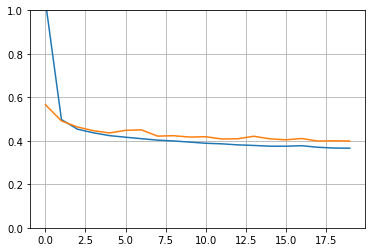

In [48]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 함수형 API를 사용해 복잡한 모델 만들기

In [49]:
input_ = keras.layers.Input(x_train.shape[1:])
hidden1 = keras.layers.Dense(30, 'relu')(input_)
hidden2 = keras.layers.Dense(30, 'relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [50]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [51]:
x_new = x_test[:3]           #새로운 샘플이라 생각하면됩니다.
y_pred = model.predict(x_new)
y_pred

array([[-0.11021575],
       [-0.2672109 ],
       [ 0.01973808]], dtype=float32)

In [52]:
# Input_B는 딥러닝을 하고 마지막에 Input_A와 합친 후에 출력한다.
input_A = keras.layers.Input([5], name='wide_input')
input_B = keras.layers.Input([6], name='deep_input')
hidden1 = keras.layers.Dense(30, 'relu')(input_B)
hidden2 = keras.layers.Dense(30, 'relu')(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [53]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 30)           930         dense_8[0][0]                    
____________________________________________________________________________________________

In [54]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

In [55]:
x_train_A, x_train_B = x_train[:, :5], x_train[:, 2:]
x_valid_A, x_valid_B = x_valid[:, :5], x_valid[:, 2:]
x_test_A, x_test_B = x_test[:, :5], x_test[:, 2:]
x_new_A, x_new_B = x_test_A[:3], x_test_B[:3]

In [56]:
history = model.fit((x_train_A, x_train_B), y_train, epochs=20, validation_data=((x_valid_A, x_valid_B), y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 51us/sample - loss: 2.1061 - val_loss: 0.8011
Epoch 2/20
11610/11610 [==============================] - 0s 24us/sample - loss: 0.7024 - val_loss: 0.6389
Epoch 3/20
11610/11610 [==============================] - 0s 24us/sample - loss: 0.6151 - val_loss: 0.5960
Epoch 4/20
11610/11610 [==============================] - 0s 25us/sample - loss: 0.5798 - val_loss: 0.5735
Epoch 5/20
11610/11610 [==============================] - 0s 24us/sample - loss: 0.5595 - val_loss: 0.5571
Epoch 6/20
11610/11610 [==============================] - 0s 24us/sample - loss: 0.5441 - val_loss: 0.5450
Epoch 7/20
11610/11610 [==============================] - 0s 24us/sample - loss: 0.5327 - val_loss: 0.5371
Epoch 8/20
11610/11610 [==============================] - 0s 24us/sample - loss: 0.5242 - val_loss: 0.5323
Epoch 9/20
11610/11610 [==============================] - 0s 24us/sample - loss: 0.5173 - val_l

In [57]:
mse_test = model.evaluate((x_test_A, x_test_B), y_test)

5160/5160 [==============================] - 0s 12us/sample - loss: 0.4933


In [58]:
y_pred = model.predict((x_new_A, x_new_B))

In [59]:
y_pred

array([[0.6794081],
       [1.8213902],
       [2.8398013]], dtype=float32)

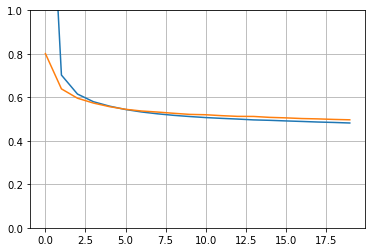

In [60]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [61]:
# Input_B는 딥러닝을 하고 마지막에 Input_A와 합친 후에 출력한다.
# 출력층 2개 메인출력층, 보조출력층ㄴ
input_A = keras.layers.Input([5], name='wide_input')
input_B = keras.layers.Input([6], name='deep_input')
hidden1 = keras.layers.Dense(30, 'relu')(input_B)
hidden2 = keras.layers.Dense(30, 'relu')(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [62]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 30)           930         dense_10[0][0]                   
____________________________________________________________________________________________

In [63]:
x_train_A, x_train_B = x_train[:, :5], x_train[:, 2:]
x_valid_A, x_valid_B = x_valid[:, :5], x_valid[:, 2:]
x_test_A, x_test_B = x_test[:, :5], x_test[:, 2:]
x_new_A, x_new_B = x_test_A[:3], x_test_B[:3]

In [64]:
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')

In [65]:
history = model.fit([x_train_A, x_train_B], [y_train, y_train], epochs=20, validation_data=([x_valid_A, x_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 57us/sample - loss: 0.9594 - main_output_loss: 0.8585 - aux_output_loss: 1.8652 - val_loss: 0.7311 - val_main_output_loss: 0.6651 - val_aux_output_loss: 1.3233
Epoch 2/20
11610/11610 [==============================] - 0s 26us/sample - loss: 0.6046 - main_output_loss: 0.5470 - aux_output_loss: 1.1227 - val_loss: 0.5907 - val_main_output_loss: 0.5429 - val_aux_output_loss: 1.0202
Epoch 3/20
11610/11610 [==============================] - 0s 26us/sample - loss: 0.5671 - main_output_loss: 0.5264 - aux_output_loss: 0.9327 - val_loss: 0.5310 - val_main_output_loss: 0.4897 - val_aux_output_loss: 0.9013
Epoch 4/20
11610/11610 [==============================] - 0s 26us/sample - loss: 0.4973 - main_output_loss: 0.4605 - aux_output_loss: 0.8275 - val_loss: 0.5023 - val_main_output_loss: 0.4695 - val_aux_output_loss: 0.7972
Epoch 5/20
11610/11610 [==============================] - 0s 27us/s

In [66]:
# 모델 저장
model.save('.\models\my_keras_model_multi_IO_model.h5')

In [67]:
# 콜백
checkpoint_cv = keras.callbacks.ModelCheckpoint('.\models\my_keras_model_multi_IO_model.h5', save_best_only=True)
history = model.fit([x_train_A, x_train_B], [y_train, y_train], epochs=20, validation_data=([x_valid_A, x_valid_B], [y_valid, y_valid]), callbacks=[checkpoint_cv])

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 0s 27us/sample - loss: 0.3623 - main_output_loss: 0.3485 - aux_output_loss: 0.4879 - val_loss: 0.4029 - val_main_output_loss: 0.3905 - val_aux_output_loss: 0.5143
Epoch 2/20
11610/11610 [==============================] - 0s 27us/sample - loss: 0.3621 - main_output_loss: 0.3485 - aux_output_loss: 0.4834 - val_loss: 0.3907 - val_main_output_loss: 0.3777 - val_aux_output_loss: 0.5071
Epoch 3/20
11610/11610 [==============================] - 0s 27us/sample - loss: 0.3564 - main_output_loss: 0.3434 - aux_output_loss: 0.4732 - val_loss: 0.3845 - val_main_output_loss: 0.3720 - val_aux_output_loss: 0.4965
Epoch 4/20
11610/11610 [==============================] - 0s 26us/sample - loss: 0.3550 - main_output_loss: 0.3421 - aux_output_loss: 0.4711 - val_loss: 0.3863 - val_main_output_loss: 0.3733 - val_aux_output_loss: 0.5018
Epoch 5/20
11610/11610 [==============================] - 0s 27us/s

In [68]:
model.save_weights('.\weights\my_keras_model_multi_IO_model.ckpt')

In [69]:
model.load_weights('.\weights\my_keras_model_multi_IO_model.ckpt')

In [70]:
model = keras.models.load_model('.\models\my_keras_model_multi_IO_model.h5')

In [71]:
total_loss, main_loss, aux_loss = model.evaluate([x_test_A, x_test_B], [y_test, y_test])
y_pred, y_pred_aux = model.predict([x_new_A, x_new_B])

5160/5160 [==============================] - 0s 28us/sample - loss: 0.3370 - main_output_loss: 0.3279 - aux_output_loss: 0.4144


In [72]:
total_loss, main_loss, aux_loss

(0.3370176742243212, 0.32790646, 0.4144236)

In [73]:
y_pred, y_pred_aux

(array([[0.5355965],
        [1.4718468],
        [3.561123 ]], dtype=float32),
 array([[0.6603018],
        [1.7209829],
        [2.991622 ]], dtype=float32))

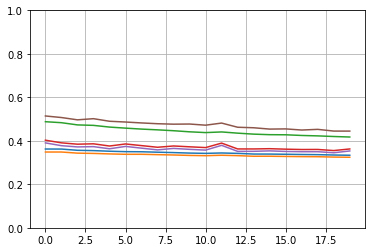

In [74]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 서브클래싱 API로 동적 모델 만들기

In [75]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)         # 표준 매개변수를 처리함(name같은거)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
       
        return main_output, aux_output

In [76]:
model = WideAndDeepModel()

In [77]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [78]:
history = model.fit((x_train_A, x_train_B), (y_train, y_train), epochs=10, validation_data=((x_valid_A, x_valid_B), (y_valid, y_valid)))

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 64us/sample - loss: 2.6257 - output_1_loss: 2.4718 - output_2_loss: 4.0021 - val_loss: 1.0797 - val_output_1_loss: 0.8443 - val_output_2_loss: 3.1974
Epoch 2/10
11610/11610 [==============================] - 0s 26us/sample - loss: 0.9046 - output_1_loss: 0.7107 - output_2_loss: 2.6495 - val_loss: 0.8348 - val_output_1_loss: 0.6581 - val_output_2_loss: 2.4242
Epoch 3/10
11610/11610 [==============================] - 0s 25us/sample - loss: 0.7652 - output_1_loss: 0.6170 - output_2_loss: 2.0980 - val_loss: 0.7565 - val_output_1_loss: 0.6160 - val_output_2_loss: 2.0194
Epoch 4/10
11610/11610 [==============================] - 0s 26us/sample - loss: 0.7025 - output_1_loss: 0.5805 - output_2_loss: 1.7996 - val_loss: 0.7109 - val_output_1_loss: 0.5921 - val_output_2_loss: 1.7800
Epoch 5/10
11610/11610 [==============================] - 0s 26us/sample - loss: 0.6641 - output_1_loss: 0.

In [79]:
# evaluate 오차추정치
total_loss, main_loss, aux_loss = model.evaluate((x_test_A, x_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((x_new_A, x_new_B))

5160/5160 [==============================] - 0s 14us/sample - loss: 0.5953 - output_1_loss: 0.5181 - output_2_loss: 1.3012


In [80]:
# 모델 저장 및 복원
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [81]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))
mse_test = model.evaluate(x_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 0s 39us/sample - loss: 1.9914 - val_loss: 1.0118
Epoch 2/10
11610/11610 [==============================] - 0s 22us/sample - loss: 0.8552 - val_loss: 0.7744
Epoch 3/10
11610/11610 [==============================] - 0s 22us/sample - loss: 0.7188 - val_loss: 0.7073
Epoch 4/10
11610/11610 [==============================] - 0s 22us/sample - loss: 0.6628 - val_loss: 0.6642
Epoch 5/10
11610/11610 [==============================] - 0s 22us/sample - loss: 0.6230 - val_loss: 0.6325
Epoch 6/10
11610/11610 [==============================] - 0s 23us/sample - loss: 0.5922 - val_loss: 0.6014
Epoch 7/10
11610/11610 [==============================] - 0s 22us/sample - loss: 0.5675 - val_loss: 0.5823
Epoch 8/10
11610/11610 [==============================] - 0s 22us/sample - loss: 0.5465 - val_loss: 0.5602
Epoch 9/10
11610/11610 [==============================] - 0s 22us/sample - loss: 0.5289 - val_l

In [82]:
model.save(".\models\my_keras_model.h5")

In [83]:
model = keras.models.load_model(".\models\my_keras_model.h5")

In [84]:
model.predict(x_new)

array([[0.87226343],
       [1.3419807 ],
       [2.729253  ]], dtype=float32)

In [85]:
model.save_weights(".\models\my_keras_weights.ckpt")

In [86]:
model.load_weights(".\models\my_keras_weights.ckpt")

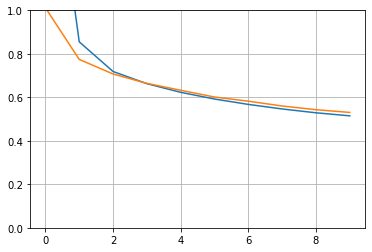

In [87]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 훈련과정에서 콜백하기

In [88]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [89]:
model.compile(loss='mse', optimizer = keras.optimizers.SGD(1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint('.\models\my_keras_model.h5', save_best_only=True)

In [90]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid), callbacks=[checkpoint_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 0s 39us/sample - loss: 1.9575 - val_loss: 0.8953
Epoch 2/10
11610/11610 [==============================] - 0s 22us/sample - loss: 0.8295 - val_loss: 0.7458
Epoch 3/10
11610/11610 [==============================] - 0s 22us/sample - loss: 0.7110 - val_loss: 0.7009
Epoch 4/10
11610/11610 [==============================] - 0s 23us/sample - loss: 0.6702 - val_loss: 0.6660
Epoch 5/10
11610/11610 [==============================] - 0s 23us/sample - loss: 0.6395 - val_loss: 0.6404
Epoch 6/10
11610/11610 [==============================] - 0s 23us/sample - loss: 0.6153 - val_loss: 0.6201
Epoch 7/10
11610/11610 [==============================] - 0s 23us/sample - loss: 0.5957 - val_loss: 0.6018
Epoch 8/10
11610/11610 [==============================] - 0s 22us/sample - loss: 0.5788 - val_loss: 0.5870
Epoch 9/10
11610/11610 [==============================] - 0s 23us/sample - loss: 0.5640 - val_l

In [91]:
model = keras.models.load_model('.\models\my_keras_model.h5')

In [92]:
mse_test =model.evaluate(x_test, y_test)

5160/5160 [==============================] - 0s 18us/sample - loss: 0.5448


In [93]:
model.compile(loss = 'mse', optimizer=keras.optimizers.SGD(1e-3))

In [94]:
# 훈련 조기 종료 (모델이 향상되지 않으면)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [95]:
# 체크포인트 저장 (위 checkpoint_cb), 조기 종료(early_stopping_cb)를 callbacks 인자에 넣어둠 (리스트형식)
# epochs  횟수는 상관없음
history = model.fit(x_train, y_train, epochs=1000, validation_data=(x_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/1000
11610/11610 [==============================] - 1s 47us/sample - loss: 0.5391 - val_loss: 0.5501
Epoch 2/1000
11610/11610 [==============================] - 0s 23us/sample - loss: 0.5286 - val_loss: 0.5395
Epoch 3/1000
11610/11610 [==============================] - 0s 23us/sample - loss: 0.5187 - val_loss: 0.5302
Epoch 4/1000
11610/11610 [==============================] - 0s 23us/sample - loss: 0.5104 - val_loss: 0.5226
Epoch 5/1000
11610/11610 [==============================] - 0s 22us/sample - loss: 0.5026 - val_loss: 0.5159
Epoch 6/1000
11610/11610 [==============================] - 0s 23us/sample - loss: 0.4959 - val_loss: 0.5100
Epoch 7/1000
11610/11610 [==============================] - 0s 22us/sample - loss: 0.4896 - val_loss: 0.5038
Epoch 8/1000
11610/11610 [==============================] - 0s 22us/sample - loss: 0.4843 - val_loss: 0.4985
Epoch 9/1000
11610/11610 [==============================] - 0s 22us/sample - lo

11610/11610 [==============================] - 0s 23us/sample - loss: 0.3783 - val_loss: 0.4095
Epoch 76/1000
11610/11610 [==============================] - 0s 23us/sample - loss: 0.3776 - val_loss: 0.4088
Epoch 77/1000
11610/11610 [==============================] - 0s 24us/sample - loss: 0.3768 - val_loss: 0.4083
Epoch 78/1000
11610/11610 [==============================] - 0s 24us/sample - loss: 0.3760 - val_loss: 0.4075
Epoch 79/1000
11610/11610 [==============================] - 0s 22us/sample - loss: 0.3754 - val_loss: 0.4083
Epoch 80/1000
11610/11610 [==============================] - 0s 22us/sample - loss: 0.3746 - val_loss: 0.4073
Epoch 81/1000
11610/11610 [==============================] - 0s 22us/sample - loss: 0.3739 - val_loss: 0.4062
Epoch 82/1000
11610/11610 [==============================] - 0s 23us/sample - loss: 0.3733 - val_loss: 0.4058
Epoch 83/1000
11610/11610 [==============================] - 0s 22us/sample - loss: 0.3724 - val_loss: 0.4064
Epoch 84/1000
11610/1161

Epoch 149/1000
11610/11610 [==============================] - 0s 23us/sample - loss: 0.3383 - val_loss: 0.3820
Epoch 150/1000
11610/11610 [==============================] - 0s 24us/sample - loss: 0.3382 - val_loss: 0.3813
Epoch 151/1000
11610/11610 [==============================] - 0s 22us/sample - loss: 0.3373 - val_loss: 0.3814
Epoch 152/1000
11610/11610 [==============================] - 0s 23us/sample - loss: 0.3374 - val_loss: 0.3814
Epoch 153/1000
11610/11610 [==============================] - 0s 23us/sample - loss: 0.3368 - val_loss: 0.3816
Epoch 154/1000
11610/11610 [==============================] - 0s 24us/sample - loss: 0.3365 - val_loss: 0.3813
Epoch 155/1000
11610/11610 [==============================] - 0s 24us/sample - loss: 0.3359 - val_loss: 0.3796
Epoch 156/1000
11610/11610 [==============================] - 0s 23us/sample - loss: 0.3358 - val_loss: 0.3806
Epoch 157/1000
11610/11610 [==============================] - 0s 23us/sample - loss: 0.3356 - val_loss: 0.3810
E

Epoch 223/1000
11610/11610 [==============================] - 0s 22us/sample - loss: 0.3138 - val_loss: 0.3621
Epoch 224/1000
11610/11610 [==============================] - 0s 23us/sample - loss: 0.3135 - val_loss: 0.3610
Epoch 225/1000
11610/11610 [==============================] - 0s 24us/sample - loss: 0.3129 - val_loss: 0.3610
Epoch 226/1000
11610/11610 [==============================] - 0s 23us/sample - loss: 0.3127 - val_loss: 0.3622
Epoch 227/1000
11610/11610 [==============================] - 0s 23us/sample - loss: 0.3125 - val_loss: 0.3601
Epoch 228/1000
11610/11610 [==============================] - 0s 23us/sample - loss: 0.3122 - val_loss: 0.3601
Epoch 229/1000
11610/11610 [==============================] - 0s 22us/sample - loss: 0.3123 - val_loss: 0.3603
Epoch 230/1000
11610/11610 [==============================] - 0s 22us/sample - loss: 0.3120 - val_loss: 0.3592
Epoch 231/1000
11610/11610 [==============================] - 0s 22us/sample - loss: 0.3116 - val_loss: 0.3593
E

Epoch 297/1000
11610/11610 [==============================] - 0s 23us/sample - loss: 0.2973 - val_loss: 0.3456
Epoch 298/1000
11610/11610 [==============================] - 0s 22us/sample - loss: 0.2968 - val_loss: 0.3470
Epoch 299/1000
11610/11610 [==============================] - 0s 23us/sample - loss: 0.2969 - val_loss: 0.3451
Epoch 300/1000
11610/11610 [==============================] - 0s 22us/sample - loss: 0.2961 - val_loss: 0.3471
Epoch 301/1000
11610/11610 [==============================] - 0s 22us/sample - loss: 0.2958 - val_loss: 0.3457
Epoch 302/1000
11610/11610 [==============================] - 0s 22us/sample - loss: 0.2959 - val_loss: 0.3491
Epoch 303/1000
11610/11610 [==============================] - 0s 22us/sample - loss: 0.2957 - val_loss: 0.3448
Epoch 304/1000
11610/11610 [==============================] - 0s 22us/sample - loss: 0.2953 - val_loss: 0.3474
Epoch 305/1000
11610/11610 [==============================] - 0s 22us/sample - loss: 0.2956 - val_loss: 0.3455
E

In [96]:
class PrintValTrainRatioCallBack(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print('\nval/train: {:.2f}'.format(logs['val_loss'] / logs['loss']))

In [97]:
val_train_ratio_cb = PrintValTrainRatioCallBack()
history = model.fit(x_train , y_train, epochs=1, validation_data=(x_valid, y_valid), callbacks=[val_train_ratio_cb])

Train on 11610 samples, validate on 3870 samples
 8832/11610 [=====================>........] - ETA: 0s - loss: 0.2844
val/train: 1.17
11610/11610 [==============================] - 0s 22us/sample - loss: 0.2903 - val_loss: 0.3399


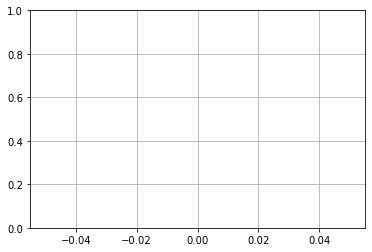

In [98]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 텐서보드 ↓

In [99]:
import os

In [100]:
root_logdir = os.path.join(os.curdir,'my_logs')

In [101]:
def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

In [102]:
run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2020_06_27-21_00_50'

In [103]:
keras.backend.clear_session()

In [104]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1),
])

In [105]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(1e-3))

In [106]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid), callbacks=[tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 67us/sample - loss: 1.6104 - val_loss: 0.8706
Epoch 2/30
11610/11610 [==============================] - 0s 31us/sample - loss: 0.8061 - val_loss: 0.7314
Epoch 3/30
11610/11610 [==============================] - 0s 30us/sample - loss: 0.7002 - val_loss: 0.6657
Epoch 4/30
11610/11610 [==============================] - 0s 31us/sample - loss: 0.6407 - val_loss: 0.6201
Epoch 5/30
11610/11610 [==============================] - 0s 30us/sample - loss: 0.6003 - val_loss: 0.5869
Epoch 6/30
11610/11610 [==============================] - 0s 31us/sample - loss: 0.5715 - val_loss: 0.5618
Epoch 7/30
11610/11610 [==============================] - 0s 32us/sample - loss: 0.5482 - val_loss: 0.5436
Epoch 8/30
11610/11610 [==============================] - 0s 31us/sample - loss: 0.5308 - val_loss: 0.5291
Epoch 9/30
11610/11610 [==============================] - 0s 31us/sample - loss: 0.5181 - val_l

In [107]:
# %load_ext tensorboard
# %tensorboard --logdir=./my_logs --port = 6006

In [108]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2020_06_27-21_01_02'

In [109]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(1e-5))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid), callbacks=[tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 59us/sample - loss: 0.4356 - val_loss: 0.4486
Epoch 2/30
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4356 - val_loss: 0.4485
Epoch 3/30
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4355 - val_loss: 0.4485
Epoch 4/30
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4355 - val_loss: 0.4485
Epoch 5/30
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4354 - val_loss: 0.4485
Epoch 6/30
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4354 - val_loss: 0.4484
Epoch 7/30
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4354 - val_loss: 0.4484
Epoch 8/30
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4353 - val_loss: 0.4484
Epoch 9/30
11610/11610 [==============================] - 0s 31us/sample - loss: 0.4353 - val_l

In [110]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module tensorflow.python.keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, update_freq='epoch', profile_batch=2, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



In [111]:
test_logdir = get_run_logdir()

In [112]:
writer = tf.summary.create_file_writer(test_logdir)

In [113]:
with writer.as_default():
    for step in range(1, 1000+1):
        tf.summary.scalar('my_scaler', np.sin(step/10), step = step)
        data = (np.random.randn(100)+2) * step / 100
        tf.summary.histogram('my_hist', data, buckets=50, step = step)
        images = np.random.rand(2, 32, 32, 3)
        tf.summary.image('my_images', images * step / 1000, step = step)
        texts = ['the step is ' + str(step), 'Its square is ' + str(step**2)]
        tf.summary.text('my_text', texts, step = step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave,  tf.float32), [1, -1, 1])
        tf.summary.audio('my_audio', audio, sample_rate=48000, step = step)

## 하이퍼파라미터 튜닝

In [114]:
def build_model(n_hidden=1, n_neurons=30, learning_rate = 3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    
    return model

In [115]:
# wrappers = 포장지
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [116]:
# patience = 참을성
keras_reg.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 0s 37us/sample - loss: 1.5436 - val_loss: 0.7196
Epoch 2/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.6562 - val_loss: 0.6269
Epoch 3/100
11610/11610 [==============================] - 0s 22us/sample - loss: 0.5901 - val_loss: 0.5808
Epoch 4/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.5480 - val_loss: 0.5491
Epoch 5/100
11610/11610 [==============================] - 0s 22us/sample - loss: 0.5242 - val_loss: 0.5258
Epoch 6/100
11610/11610 [==============================] - 0s 22us/sample - loss: 0.5018 - val_loss: 0.5105
Epoch 7/100
11610/11610 [==============================] - 0s 22us/sample - loss: 0.4919 - val_loss: 0.4989
Epoch 8/100
11610/11610 [==============================] - 0s 22us/sample - loss: 0.4802 - val_loss: 0.4926
Epoch 9/100
11610/11610 [==============================] - 0s 22us/sample - loss: 0.475

Epoch 76/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.3598 - val_loss: 0.3967
Epoch 77/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.3608 - val_loss: 0.3937
Epoch 78/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.3590 - val_loss: 0.3965
Epoch 79/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.3586 - val_loss: 0.3921
Epoch 80/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.3572 - val_loss: 0.3943
Epoch 81/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.3578 - val_loss: 0.3940
Epoch 82/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.3573 - val_loss: 0.3925
Epoch 83/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.3562 - val_loss: 0.3957
Epoch 84/100
11610/11610 [==============================] - 0s 21us/sample - loss: 0.3557 - val_loss: 0.3928
Epoch 85/100
11610/

In [117]:
mse_test = keras_reg.score(x_test, y_test)
y_pred = keras_reg.predict(x_new)

5160/5160 [==============================] - 0s 10us/sample - loss: 0.3580


In [118]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [119]:
param_distribs = {
    'n_hidden' : [0, 1, 2, 3],
    'n_neurons' : np.arange(1, 100),
    'learning_rate' : reciprocal(3e-4, 3e-2),
}

In [120]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)

In [121]:
rnd_search_cv.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.0011195351881132835, n_hidden=3, n_neurons=35 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


7740/7740 [==============================] - 0s 55us/sample - loss: 1.6233 - val_loss: 0.8471
Epoch 2/100
7740/7740 [==============================] - 0s 27us/sample - loss: 0.7282 - val_loss: 0.7171
Epoch 3/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.6586 - val_loss: 0.6611
Epoch 4/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.6199 - val_loss: 0.6241
Epoch 5/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.5902 - val_loss: 0.5947
Epoch 6/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.5654 - val_loss: 0.5697
Epoch 7/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.5448 - val_loss: 0.5484
Epoch 8/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.5280 - val_loss: 0.5322
Epoch 9/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.5134 - val_loss: 0.5177
Epoch 10/100
7740/7740 [==============================] - 

Epoch 78/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.3587 - val_loss: 0.3939
Epoch 79/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.3570 - val_loss: 0.3952
Epoch 80/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.3569 - val_loss: 0.3946
Epoch 81/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.3560 - val_loss: 0.3922
Epoch 82/100
7740/7740 [==============================] - 0s 27us/sample - loss: 0.3551 - val_loss: 0.3920
Epoch 83/100
7740/7740 [==============================] - 0s 27us/sample - loss: 0.3544 - val_loss: 0.3939
Epoch 84/100
7740/7740 [==============================] - 0s 31us/sample - loss: 0.3535 - val_loss: 0.3903
Epoch 85/100
7740/7740 [==============================] - 0s 27us/sample - loss: 0.3530 - val_loss: 0.3902
Epoch 86/100
7740/7740 [==============================] - 0s 27us/sample - loss: 0.3520 - val_loss: 0.3894
Epoch 87/100
7740/7740 [=============

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s remaining:    0.0s


7740/7740 [==============================] - ETA: 0s - loss: 2.5151 - 0s 64us/sample - loss: 2.1246 - val_loss: 0.9633
Epoch 2/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.8269 - val_loss: 0.7459
Epoch 3/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.6990 - val_loss: 0.6947
Epoch 4/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.6539 - val_loss: 0.6673
Epoch 5/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.6237 - val_loss: 0.6455
Epoch 6/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.6001 - val_loss: 0.6233
Epoch 7/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.5791 - val_loss: 0.6052
Epoch 8/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.5608 - val_loss: 0.5890
Epoch 9/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.5443 - val_loss: 0.5739
Epoch 10/100
7740/7740 [=========

7740/7740 [==============================] - 0s 25us/sample - loss: 0.3635 - val_loss: 0.4025
Epoch 78/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.3634 - val_loss: 0.4004
Epoch 79/100
7740/7740 [==============================] - 0s 27us/sample - loss: 0.3627 - val_loss: 0.4005
Epoch 80/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.3612 - val_loss: 0.4006
Epoch 81/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.3603 - val_loss: 0.3998
Epoch 82/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.3593 - val_loss: 0.3963
Epoch 83/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.3588 - val_loss: 0.3969
Epoch 84/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.3580 - val_loss: 0.3954
Epoch 85/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.3569 - val_loss: 0.3977
Epoch 86/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 25us/sample - loss: 0.4004 - val_loss: 0.4253
Epoch 52/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.3971 - val_loss: 0.4232
Epoch 53/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.3957 - val_loss: 0.4230
Epoch 54/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.3944 - val_loss: 0.4232
Epoch 55/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.3936 - val_loss: 0.4218
Epoch 56/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.3931 - val_loss: 0.4196
Epoch 57/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.3925 - val_loss: 0.4219
Epoch 58/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.3912 - val_loss: 0.4173
Epoch 59/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.3896 - val_loss: 0.4176
Epoch 60/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 25us/sample - loss: 0.4569 - val_loss: 0.4722
Epoch 26/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.4550 - val_loss: 0.4710
Epoch 27/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4528 - val_loss: 0.4694
Epoch 28/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4511 - val_loss: 0.4672
Epoch 29/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4494 - val_loss: 0.4652
Epoch 30/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4474 - val_loss: 0.4646
Epoch 31/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.4455 - val_loss: 0.4625
Epoch 32/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4440 - val_loss: 0.4612
Epoch 33/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4426 - val_loss: 0.4600
Epoch 34/100
7740/7740 [==========================

[CV]  learning_rate=0.0019193781100231727, n_hidden=1, n_neurons=75, total=  20.1s
[CV] learning_rate=0.0019193781100231727, n_hidden=1, n_neurons=75 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 49us/sample - loss: 1.9536 - val_loss: 0.8487
Epoch 2/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.7680 - val_loss: 0.7421
Epoch 3/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.7011 - val_loss: 0.7047
Epoch 4/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.6628 - val_loss: 0.6699
Epoch 5/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.6319 - val_loss: 0.6425
Epoch 6/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.6059 - val_loss: 0.6192
Epoch 7/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.5849 - val_loss: 0.5988
Epoch 8/100
7740/7740 [==============================] -

Epoch 76/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3848 - val_loss: 0.4165
Epoch 77/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3852 - val_loss: 0.4151
Epoch 78/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3825 - val_loss: 0.4159
Epoch 79/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3823 - val_loss: 0.4142
Epoch 80/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3833 - val_loss: 0.4164
Epoch 81/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3816 - val_loss: 0.4150
Epoch 82/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3823 - val_loss: 0.4138
Epoch 83/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.3807 - val_loss: 0.4131
Epoch 84/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3801 - val_loss: 0.4131
Epoch 85/100
7740/7740 [=============

7740/7740 [==============================] - 0s 24us/sample - loss: 0.4093 - val_loss: 0.4293
Epoch 51/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.4083 - val_loss: 0.4286
Epoch 52/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4074 - val_loss: 0.4269
Epoch 53/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4061 - val_loss: 0.4285
Epoch 54/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4055 - val_loss: 0.4254
Epoch 55/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4044 - val_loss: 0.4257
Epoch 56/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4034 - val_loss: 0.4251
Epoch 57/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.4026 - val_loss: 0.4248
Epoch 58/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4021 - val_loss: 0.4234
Epoch 59/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 25us/sample - loss: 0.5064 - val_loss: 0.5221
Epoch 25/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.5014 - val_loss: 0.5177
Epoch 26/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.4971 - val_loss: 0.5134
Epoch 27/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4927 - val_loss: 0.5098
Epoch 28/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4886 - val_loss: 0.5056
Epoch 29/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.4846 - val_loss: 0.5029
Epoch 30/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.4809 - val_loss: 0.4989
Epoch 31/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4775 - val_loss: 0.4954
Epoch 32/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.4743 - val_loss: 0.4925
Epoch 33/100
7740/7740 [==========================

3870/3870 [==============================] - 0s 11us/sample - loss: 0.4153
[CV]  learning_rate=0.0007617196357040952, n_hidden=2, n_neurons=13, total=  19.4s
[CV] learning_rate=0.0007617196357040952, n_hidden=2, n_neurons=13 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 51us/sample - loss: 3.3300 - val_loss: 1.6281
Epoch 2/100
7740/7740 [==============================] - 0s 25us/sample - loss: 1.3092 - val_loss: 1.0123
Epoch 3/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.9691 - val_loss: 0.9133
Epoch 4/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.8685 - val_loss: 0.8463
Epoch 5/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.8201 - val_loss: 0.8170
Epoch 6/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.7868 - val_loss: 0.7885
Epoch 7/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.7595 

7740/7740 [==============================] - 0s 24us/sample - loss: 0.4424 - val_loss: 0.4774
Epoch 75/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4409 - val_loss: 0.4771
Epoch 76/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.4402 - val_loss: 0.4750
Epoch 77/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.4401 - val_loss: 0.4742
Epoch 78/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.4391 - val_loss: 0.4743
Epoch 79/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4380 - val_loss: 0.4744
Epoch 80/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4378 - val_loss: 0.4732
Epoch 81/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4367 - val_loss: 0.4716
Epoch 82/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4364 - val_loss: 0.4717
Epoch 83/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 25us/sample - loss: 0.4397 - val_loss: 0.4518
Epoch 49/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4385 - val_loss: 0.4507
Epoch 50/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4371 - val_loss: 0.4498
Epoch 51/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4360 - val_loss: 0.4490
Epoch 52/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4349 - val_loss: 0.4472
Epoch 53/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4336 - val_loss: 0.4461
Epoch 54/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4324 - val_loss: 0.4452
Epoch 55/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4313 - val_loss: 0.4443
Epoch 56/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4302 - val_loss: 0.4431
Epoch 57/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 25us/sample - loss: 0.4508 - val_loss: 0.4647
Epoch 23/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.4468 - val_loss: 0.4612
Epoch 24/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.4438 - val_loss: 0.4590
Epoch 25/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.4405 - val_loss: 0.4566
Epoch 26/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4382 - val_loss: 0.4552
Epoch 27/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4355 - val_loss: 0.4532
Epoch 28/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4329 - val_loss: 0.4518
Epoch 29/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4307 - val_loss: 0.4496
Epoch 30/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.4286 - val_loss: 0.4462
Epoch 31/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 25us/sample - loss: 0.3595 - val_loss: 0.3920
Epoch 99/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3589 - val_loss: 0.3908
Epoch 100/100
3870/3870 [==============================] - 0s 11us/sample - loss: 0.3749
[CV]  learning_rate=0.001529089812000745, n_hidden=2, n_neurons=19, total=  19.5s
[CV] learning_rate=0.001529089812000745, n_hidden=2, n_neurons=19 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 50us/sample - loss: 2.5446 - val_loss: 1.1110
Epoch 2/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.8469 - val_loss: 0.7220
Epoch 3/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.6703 - val_loss: 0.6649
Epoch 4/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.6231 - val_loss: 0.6349
Epoch 5/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.592

7740/7740 [==============================] - 0s 24us/sample - loss: 0.3802 - val_loss: 0.4153
Epoch 73/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3790 - val_loss: 0.4157
Epoch 74/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.3782 - val_loss: 0.4169
Epoch 75/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.3786 - val_loss: 0.4164
Epoch 76/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3775 - val_loss: 0.4162
Epoch 77/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3769 - val_loss: 0.4151
Epoch 78/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3752 - val_loss: 0.4132
Epoch 79/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3752 - val_loss: 0.4140
Epoch 80/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3750 - val_loss: 0.4127
Epoch 81/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 24us/sample - loss: 0.4220 - val_loss: 0.4439
Epoch 47/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4208 - val_loss: 0.4430
Epoch 48/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4193 - val_loss: 0.4395
Epoch 49/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4179 - val_loss: 0.4402
Epoch 50/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4168 - val_loss: 0.4389
Epoch 51/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.4156 - val_loss: 0.4387
Epoch 52/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.4145 - val_loss: 0.4369
Epoch 53/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.4130 - val_loss: 0.4351
Epoch 54/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4120 - val_loss: 0.4342
Epoch 55/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 24us/sample - loss: 0.4701 - val_loss: 0.4909
Epoch 21/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4662 - val_loss: 0.4885
Epoch 22/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.4632 - val_loss: 0.4857
Epoch 23/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4604 - val_loss: 0.4872
Epoch 24/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4574 - val_loss: 0.4868
Epoch 25/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4545 - val_loss: 0.4830
Epoch 26/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4518 - val_loss: 0.4764
Epoch 27/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4487 - val_loss: 0.4767
Epoch 28/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.4452 - val_loss: 0.4725
Epoch 29/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 24us/sample - loss: 0.3736 - val_loss: 0.4112
Epoch 97/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3733 - val_loss: 0.4109
Epoch 98/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3727 - val_loss: 0.4120
Epoch 99/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3723 - val_loss: 0.4104
Epoch 100/100
3870/3870 [==============================] - 0s 11us/sample - loss: 0.3879
[CV]  learning_rate=0.001609164958586291, n_hidden=2, n_neurons=13, total=  19.3s
[CV] learning_rate=0.001609164958586291, n_hidden=2, n_neurons=13 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 52us/sample - loss: 2.5743 - val_loss: 1.5780
Epoch 2/100
7740/7740 [==============================] - 0s 25us/sample - loss: 1.1642 - val_loss: 0.9346
Epoch 3/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.8

7740/7740 [==============================] - 0s 25us/sample - loss: 0.3748 - val_loss: 0.4209
Epoch 71/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3745 - val_loss: 0.4195
Epoch 72/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3737 - val_loss: 0.4193
Epoch 73/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3731 - val_loss: 0.4183
Epoch 74/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3724 - val_loss: 0.4181
Epoch 75/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.3717 - val_loss: 0.4165
Epoch 76/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.3711 - val_loss: 0.4180
Epoch 77/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3706 - val_loss: 0.4162
Epoch 78/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3699 - val_loss: 0.4159
Epoch 79/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 24us/sample - loss: 0.4462 - val_loss: 0.4566
Epoch 45/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4448 - val_loss: 0.4561
Epoch 46/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4432 - val_loss: 0.4553
Epoch 47/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.4423 - val_loss: 0.4523
Epoch 48/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4409 - val_loss: 0.4507
Epoch 49/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4398 - val_loss: 0.4510
Epoch 50/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4384 - val_loss: 0.4496
Epoch 51/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4376 - val_loss: 0.4491
Epoch 52/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4362 - val_loss: 0.4471
Epoch 53/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 25us/sample - loss: 0.3831 - val_loss: 0.4139
Epoch 19/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.3808 - val_loss: 0.4143
Epoch 20/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.3772 - val_loss: 0.4034
Epoch 21/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.3746 - val_loss: 0.4069
Epoch 22/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.3706 - val_loss: 0.4068
Epoch 23/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.3682 - val_loss: 0.3999
Epoch 24/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.3642 - val_loss: 0.3975
Epoch 25/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.3616 - val_loss: 0.3950
Epoch 26/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.3592 - val_loss: 0.3940
Epoch 27/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 26us/sample - loss: 0.2773 - val_loss: 0.3304
Epoch 95/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.2769 - val_loss: 0.3285
Epoch 96/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.2756 - val_loss: 0.3358
Epoch 97/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.2759 - val_loss: 0.3265
Epoch 98/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.2762 - val_loss: 0.3309
Epoch 99/100
7740/7740 [==============================] - 0s 27us/sample - loss: 0.2752 - val_loss: 0.3300
Epoch 100/100
3870/3870 [==============================] - 0s 11us/sample - loss: 0.3033
[CV]  learning_rate=0.004778223340688506, n_hidden=2, n_neurons=79, total=  20.3s
[CV] learning_rate=0.004778223340688506, n_hidden=2, n_neurons=79 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 51us/sample - loss: 1

7740/7740 [==============================] - 0s 25us/sample - loss: 0.2926 - val_loss: 0.3510
Epoch 69/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.2919 - val_loss: 0.3564
Epoch 70/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.2922 - val_loss: 0.3547
Epoch 71/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.2934 - val_loss: 0.3503
Epoch 72/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.2910 - val_loss: 0.3561
Epoch 73/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.2955 - val_loss: 0.3530
Epoch 74/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.2919 - val_loss: 0.3716
Epoch 75/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.3045 - val_loss: 0.3565
Epoch 76/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.2986 - val_loss: 0.3544
Epoch 77/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 26us/sample - loss: 0.3190 - val_loss: 0.3617
Epoch 45/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.3174 - val_loss: 0.3601
Epoch 46/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.3156 - val_loss: 0.3600
Epoch 47/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.3131 - val_loss: 0.3606
Epoch 48/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.3131 - val_loss: 0.3569
Epoch 49/100
7740/7740 [==============================] - 0s 27us/sample - loss: 0.3117 - val_loss: 0.3532
Epoch 50/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.3090 - val_loss: 0.3577
Epoch 51/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.3081 - val_loss: 0.3508
Epoch 52/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.3070 - val_loss: 0.3499
Epoch 53/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 22us/sample - loss: 0.5268 - val_loss: 0.5411
Epoch 19/100
7740/7740 [==============================] - 0s 22us/sample - loss: 0.5257 - val_loss: 0.5405
Epoch 20/100
7740/7740 [==============================] - 0s 22us/sample - loss: 0.5243 - val_loss: 0.5390
Epoch 21/100
7740/7740 [==============================] - 0s 22us/sample - loss: 0.5234 - val_loss: 0.5390
Epoch 22/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.5228 - val_loss: 0.5388
Epoch 23/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.5221 - val_loss: 0.5384
Epoch 24/100
7740/7740 [==============================] - 0s 22us/sample - loss: 0.5218 - val_loss: 0.5379
Epoch 25/100
7740/7740 [==============================] - 0s 22us/sample - loss: 0.5213 - val_loss: 0.5368
Epoch 26/100
7740/7740 [==============================] - 0s 22us/sample - loss: 0.5211 - val_loss: 0.5366
Epoch 27/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 23us/sample - loss: 0.5058 - val_loss: 0.5384
Epoch 43/100
7740/7740 [==============================] - 0s 22us/sample - loss: 0.5057 - val_loss: 0.5392
Epoch 44/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.5056 - val_loss: 0.5393
Epoch 45/100
7740/7740 [==============================] - 0s 22us/sample - loss: 0.5058 - val_loss: 0.5373
Epoch 46/100
3870/3870 [==============================] - 0s 10us/sample - loss: 0.5418
[CV]  learning_rate=0.0025475864965582005, n_hidden=0, n_neurons=46, total=   8.4s
[CV] learning_rate=0.0025475864965582005, n_hidden=0, n_neurons=46 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 44us/sample - loss: 2.9888 - val_loss: 1.1139
Epoch 2/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.7894 - val_loss: 0.6142
Epoch 3/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.5

7740/7740 [==============================] - 0s 24us/sample - loss: 0.4886 - val_loss: 0.4967
Epoch 22/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.4861 - val_loss: 0.4924
Epoch 23/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4838 - val_loss: 0.4924
Epoch 24/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4812 - val_loss: 0.4870
Epoch 25/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4789 - val_loss: 0.4853
Epoch 26/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4765 - val_loss: 0.4882
Epoch 27/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.4751 - val_loss: 0.4843
Epoch 28/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4729 - val_loss: 0.4820
Epoch 29/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4710 - val_loss: 0.4804
Epoch 30/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 23us/sample - loss: 0.4095 - val_loss: 0.4335
Epoch 98/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4087 - val_loss: 0.4336
Epoch 99/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4081 - val_loss: 0.4352
Epoch 100/100
3870/3870 [==============================] - 0s 11us/sample - loss: 0.4075
[CV]  learning_rate=0.0014026850748945893, n_hidden=1, n_neurons=22, total=  18.9s
[CV] learning_rate=0.0014026850748945893, n_hidden=1, n_neurons=22 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 47us/sample - loss: 1.8866 - val_loss: 1.0227
Epoch 2/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.8348 - val_loss: 0.7737
Epoch 3/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.7023 - val_loss: 0.7164
Epoch 4/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.6

7740/7740 [==============================] - 0s 24us/sample - loss: 0.4006 - val_loss: 0.4389
Epoch 72/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4000 - val_loss: 0.4378
Epoch 73/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3995 - val_loss: 0.4387
Epoch 74/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3987 - val_loss: 0.4377
Epoch 75/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3983 - val_loss: 0.4368
Epoch 76/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3976 - val_loss: 0.4366
Epoch 77/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3968 - val_loss: 0.4353
Epoch 78/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3964 - val_loss: 0.4352
Epoch 79/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.3957 - val_loss: 0.4359
Epoch 80/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 24us/sample - loss: 0.4406 - val_loss: 0.4521
Epoch 46/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.4395 - val_loss: 0.4520
Epoch 47/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.4385 - val_loss: 0.4495
Epoch 48/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4374 - val_loss: 0.4491
Epoch 49/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.4363 - val_loss: 0.4489
Epoch 50/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.4356 - val_loss: 0.4471
Epoch 51/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4346 - val_loss: 0.4465
Epoch 52/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.4336 - val_loss: 0.4474
Epoch 53/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.4326 - val_loss: 0.4466
Epoch 54/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 24us/sample - loss: 0.4941 - val_loss: 0.5049
Epoch 20/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4910 - val_loss: 0.5007
Epoch 21/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.4879 - val_loss: 0.4981
Epoch 22/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4851 - val_loss: 0.4958
Epoch 23/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4834 - val_loss: 0.4942
Epoch 24/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.4815 - val_loss: 0.4926
Epoch 25/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4794 - val_loss: 0.4947
Epoch 26/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4784 - val_loss: 0.4890
Epoch 27/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4770 - val_loss: 0.4888
Epoch 28/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 23us/sample - loss: 0.4413 - val_loss: 0.4595
Epoch 96/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.4411 - val_loss: 0.4620
Epoch 97/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4408 - val_loss: 0.4606
Epoch 98/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4403 - val_loss: 0.4594
Epoch 99/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.4399 - val_loss: 0.4606
Epoch 100/100
3870/3870 [==============================] - 0s 11us/sample - loss: 0.4305
[CV]  learning_rate=0.0015787288731068127, n_hidden=1, n_neurons=4, total=  18.8s
[CV] learning_rate=0.0015787288731068127, n_hidden=1, n_neurons=4 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 0s 63us/sample - loss: 2.9120 - val_loss: 1.4319
Epoch 2/100
7740/7740 [==============================] - 0s 24us/sample - loss: 1.

7740/7740 [==============================] - 0s 24us/sample - loss: 0.4523 - val_loss: 0.4900
Epoch 70/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4518 - val_loss: 0.4901
Epoch 71/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.4516 - val_loss: 0.4883
Epoch 72/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.4511 - val_loss: 0.4885
Epoch 73/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4506 - val_loss: 0.4882
Epoch 74/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.4500 - val_loss: 0.4890
Epoch 75/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.4495 - val_loss: 0.4878
Epoch 76/100
7740/7740 [==============================] - 0s 23us/sample - loss: 0.4492 - val_loss: 0.4867
Epoch 77/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4489 - val_loss: 0.4866
Epoch 78/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 24us/sample - loss: 0.4777 - val_loss: 0.4920
Epoch 44/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4764 - val_loss: 0.4909
Epoch 45/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4753 - val_loss: 0.4900
Epoch 46/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4742 - val_loss: 0.4886
Epoch 47/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4733 - val_loss: 0.4877
Epoch 48/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4722 - val_loss: 0.4862
Epoch 49/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4715 - val_loss: 0.4848
Epoch 50/100
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4707 - val_loss: 0.4843
Epoch 51/100
7740/7740 [==============================] - 0s 25us/sample - loss: 0.4699 - val_loss: 0.4835
Epoch 52/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 26us/sample - loss: 0.3503 - val_loss: 0.3847
Epoch 18/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.3481 - val_loss: 0.3884
Epoch 19/100
7740/7740 [==============================] - 0s 27us/sample - loss: 0.3436 - val_loss: 0.4007
Epoch 20/100
7740/7740 [==============================] - 0s 27us/sample - loss: 0.3393 - val_loss: 0.3788
Epoch 21/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.3351 - val_loss: 0.3806
Epoch 22/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.3337 - val_loss: 0.3733
Epoch 23/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.3297 - val_loss: 0.3735
Epoch 24/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.3277 - val_loss: 0.3728
Epoch 25/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.3269 - val_loss: 0.3623
Epoch 26/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 28us/sample - loss: 0.3061 - val_loss: 0.3543
Epoch 29/100
7740/7740 [==============================] - 0s 27us/sample - loss: 0.3054 - val_loss: 0.3531
Epoch 30/100
7740/7740 [==============================] - 0s 28us/sample - loss: 0.3025 - val_loss: 0.3529
Epoch 31/100
7740/7740 [==============================] - 0s 27us/sample - loss: 0.3011 - val_loss: 0.3506
Epoch 32/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.3005 - val_loss: 0.3543
Epoch 33/100
7740/7740 [==============================] - 0s 28us/sample - loss: 0.2996 - val_loss: 0.3472
Epoch 34/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.2969 - val_loss: 0.3514
Epoch 35/100
7740/7740 [==============================] - 0s 30us/sample - loss: 0.2967 - val_loss: 0.3582
Epoch 36/100
7740/7740 [==============================] - 0s 27us/sample - loss: 0.2945 - val_loss: 0.3472
Epoch 37/100
7740/7740 [==========================

7740/7740 [==============================] - 0s 26us/sample - loss: 1.5768 - val_loss: 0.8294
Epoch 3/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.9227 - val_loss: 0.4746
Epoch 4/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.4443 - val_loss: 0.4508
Epoch 5/100
7740/7740 [==============================] - 0s 28us/sample - loss: 0.4233 - val_loss: 0.4172
Epoch 6/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.3937 - val_loss: 0.4055
Epoch 7/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.3794 - val_loss: 0.4171
Epoch 8/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.3690 - val_loss: 0.3926
Epoch 9/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.3623 - val_loss: 0.3961
Epoch 10/100
7740/7740 [==============================] - 0s 26us/sample - loss: 0.3538 - val_loss: 0.3842
Epoch 11/100
7740/7740 [==============================] -

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  9.0min finished


RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000002483BA14F08>, as the constructor either does not set or modifies parameter learning_rate

In [122]:
rnd_search_cv.best_params_

{'learning_rate': 0.009307690450944048, 'n_hidden': 2, 'n_neurons': 98}

In [123]:
rnd_search_cv.best_score_

-0.30135538698680225

In [124]:
model2 = rnd_search_cv.best_params_
model2

{'learning_rate': 0.009307690450944048, 'n_hidden': 2, 'n_neurons': 98}

In [139]:
class DeepModel(keras.models.Model):
    def __init__(self, units, activation, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
       
        return main_output, aux_output

In [140]:
model2 = DeepModel(30, 'relu')

In [141]:
model2.compile(loss='mse', optimizer='sgd')
history = model2.fit((x_train_A, x_train_B), (y_train, y_train), epochs=10, validation_data=((x_valid_A, x_valid_B), (y_valid, y_valid)))

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 58us/sample - loss: 2.0629 - output_1_loss: 0.8444 - output_2_loss: 1.2180 - val_loss: 1.3857 - val_output_1_loss: 0.5837 - val_output_2_loss: 0.8017
Epoch 2/10
11610/11610 [==============================] - 0s 26us/sample - loss: 1.1821 - output_1_loss: 0.4901 - output_2_loss: 0.6917 - val_loss: 1.1770 - val_output_1_loss: 0.5232 - val_output_2_loss: 0.6536
Epoch 3/10
11610/11610 [==============================] - 0s 26us/sample - loss: 1.1315 - output_1_loss: 0.4980 - output_2_loss: 0.6334 - val_loss: 1.2724 - val_output_1_loss: 0.5572 - val_output_2_loss: 0.7148
Epoch 4/10
11610/11610 [==============================] - 0s 26us/sample - loss: 1.3745 - output_1_loss: 0.6082 - output_2_loss: 0.7659 - val_loss: 1.0756 - val_output_1_loss: 0.4738 - val_output_2_loss: 0.6015
Epoch 5/10
11610/11610 [==============================] - 0s 26us/sample - loss: 1.0126 - output_1_loss: 0.

In [146]:
history.params

{'batch_size': 32,
 'epochs': 10,
 'steps': 363,
 'samples': 11610,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss',
  'output_1_loss',
  'output_2_loss',
  'val_loss',
  'val_output_1_loss',
  'val_output_2_loss']}

In [149]:
model.predict(x_test)

array([[0.63045937],
       [1.5561782 ],
       [3.3628025 ],
       ...,
       [1.7303405 ],
       [2.2299876 ],
       [3.741187  ]], dtype=float32)